In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
import random

## Get the data!

With the help of api.octane.gg I was able to extract
 - How many goals each team has scored
 - How many wins each team has
 - The length of the series (best of 5, 7, 9...)
 - Whether blue team won the series in the end

In [4]:
path_to_data = "./data/rawData.csv"
data = pd.read_csv(path_to_data)

data

match_url  blue_goals  orange_goals  blue_wins  orange_wins  best_of  \
0       2610224           6             2          1            0        5   
1       2610224           7             6          1            1        5   
2       2610224          13             7          2            1        5   
3       2610224          15             8          3            1        5   
4       2640123           2             3          0            1        5   
...         ...         ...           ...        ...          ...      ...   
6642     900111           6             7          2            2        5   
6643     900109           3             2          1            0        5   
6644     900109           7             3          2            0        5   
6645     900103           2             1          1            0        3   
6646     900103           4             4          1            1        3   

      did_blue_win  
0             True  
1             True  
2             True  
3             True  
4            False  
...            ...  
6642          True  
6643          True  
6644          True  
6645          True  
6646          True  

[6647 rows x 7 columns]

In [15]:
goalDiff = np.array(data.count(axis="columns"))
winDiff = np.array(data.count(axis="columns"))
wonSeries = np.array(data.count(axis="columns"))

for i,row in data.iterrows():
    goalDiff[i] = row.blue_goals - row.orange_goals
    winDiff[i] = (row.blue_wins - row.orange_wins) / round(row.best_of/2)
    wonSeries[i] = row.did_blue_win

## Let's visualize!

Blue dots means that the blue team won and orange dots means the orange team won.

In [16]:
colors = np.where(wonSeries, "blue", "orange")

Text(0, 0.5, 'Win Differential')

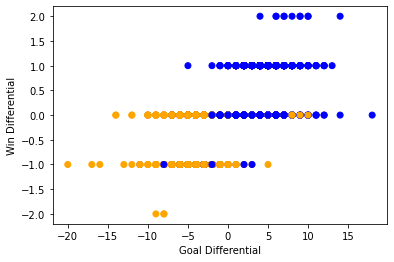

In [20]:
plt.scatter(x=goalDiff, y=winDiff, c=colors)
plt.xlabel("Goal Differential")
plt.ylabel("Win Differential")

## Density of Data
That doesn't look like over 6,000 dots. How dense is this data? Let's use a 2D histogram to visualize how many points are at each location.

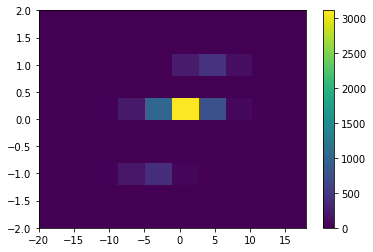

In [44]:
plt.hist2d(x=goalDiff, y=winDiff)
plt.colorbar()
plt.show()

## Splitting the data

We first combine the our two inputs, goal differential and win differential into a 2D list.

Then we can seperate our data into training and test data. Won series is our actual values.

In [94]:
data_as_list = list(zip(goalDiff, winDiff))
X_train, X_test, y_train, y_test = train_test_split(
    data_as_list, wonSeries,test_size=0.35, shuffle=True
)

In [95]:
len(X_train), len(X_test)

(4320, 2327)

## C-Support Vector Machine

Make sure we set probablity to true so we get a percentage during prediction. Then, let's fit our training data.

In [37]:
clf = SVC(probability=True)
clf.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

### So how did it do?

In [38]:
clf.score(X_test, y_test)

0.7490974729241877

### Example sample

In [39]:
i = random.choice(range(len(X_test)))
print("Tested values:")
print("Goal Differential: ", X_test[i][0])
print("Win Differential: ", X_test[i][1])
print("Expected value: ", y_test[i])
print("Blue Win Probability: ", clf.predict_proba([X_test[i][:]])[0][1])

Tested values:
Goal Differential:  5
Win Differential:  0
Expected value:  1
Blue Win Probability:  0.7858982214378708


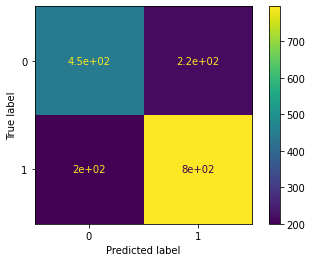

In [40]:
disp = plot_confusion_matrix(clf, X_test, y_test)

## Stochastic Gradient Descent

In [41]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(loss="hinge", penalty="elasticnet", max_iter=1000)
sgd_clf.fit(X_train, y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None,
              penalty='elasticnet', power_t=0.5, random_state=None,
              shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
              warm_start=False)

In [42]:
sgd_clf.score(X_test, y_test)

0.7316486161251504

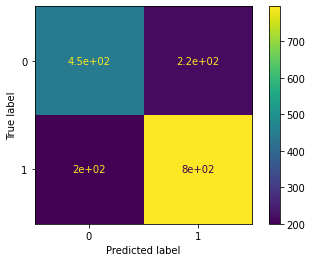

In [43]:
disp = plot_confusion_matrix(clf, X_test, y_test)

## Linear Discriminant Analysis

In [96]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

clf_lda = LinearDiscriminantAnalysis(solver="lsqr")
clf_lda.fit(X_train, y_train)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='lsqr', store_covariance=False, tol=0.0001)

In [97]:
clf_lda.score(X_test, y_test)

0.736140954018049

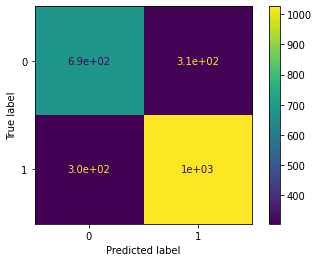

In [98]:
disp = plot_confusion_matrix(clf_lda, X_test, y_test)

## K Nearest Neighbors

In [56]:
from sklearn.neighbors import KNeighborsClassifier
clf_k = KNeighborsClassifier()
clf_k.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [57]:
clf_k.score(X_test, y_test)

0.7328519855595668

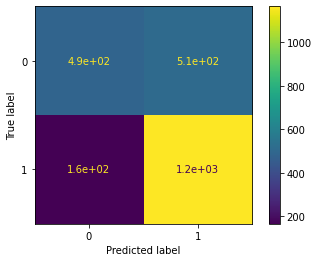

In [136]:
disp = plot_confusion_matrix(clf_k, X_test, y_test)

Yikes

## SGD Classifier

In [133]:
from sklearn.linear_model import SGDClassifier
clf_sgd = SGDClassifier(
    loss="hinge", 
    max_iter=1000, 
    tol=1e-3, 
    learning_rate="adaptive", 
    eta0=0.002, 
    early_stopping=True
)
clf_sgd.fit(X_train, y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=True, epsilon=0.1, eta0=0.002, fit_intercept=True,
              l1_ratio=0.15, learning_rate='adaptive', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [134]:
clf_sgd.score(X_test, y_test)

0.736140954018049

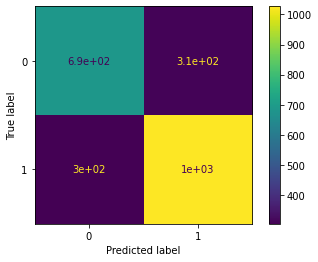

In [135]:
disp = plot_confusion_matrix(clf_sgd, X_test, y_test)